In [143]:
import pandas as pd
import numpy as np
import seaborn as sns

### Dataset

In [144]:
df = pd.read_csv('adult(cleaned).csv')

### Metrics 

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def metrics(y_true, y_pred):
    print(f"accuracy : {accuracy_score(y_true, y_pred)}" )
    print(f"recall : {recall_score(y_true, y_pred)}" )
    print(f"precision : {precision_score(y_true, y_pred)}" )
    print(f"f1 : {f1_score(y_true, y_pred)}" )
    cm = confusion_matrix(y_true, y_pred)
    print(f"confusion matrix: {cm}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### Train test Split

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
x = df.drop('income', axis=1)
y = df[['income']]

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, stratify=y)

### Importing the classifier

In [149]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
DecTree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, min_samples_split=5, splitter='random')

### Training with normalized dataset

In [151]:
DecTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       min_samples_split=5, splitter='random')

In [152]:
y_pred = DecTree.predict(x_test)

accuracy : 0.8367400191354266
recall : 0.5189208128941836
precision : 0.746095717884131
f1 : 0.6121099400702624
confusion matrix: [[8139  504]
 [1373 1481]]


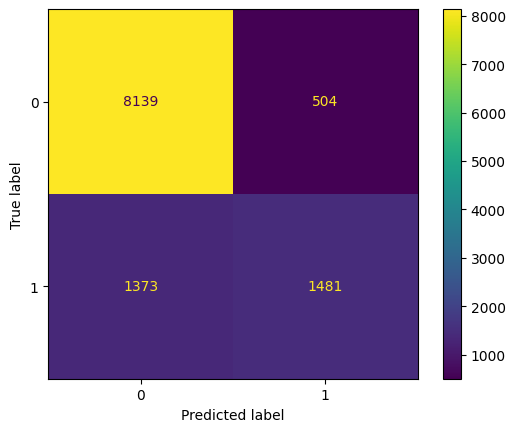

In [153]:
metrics(y_test, y_pred)

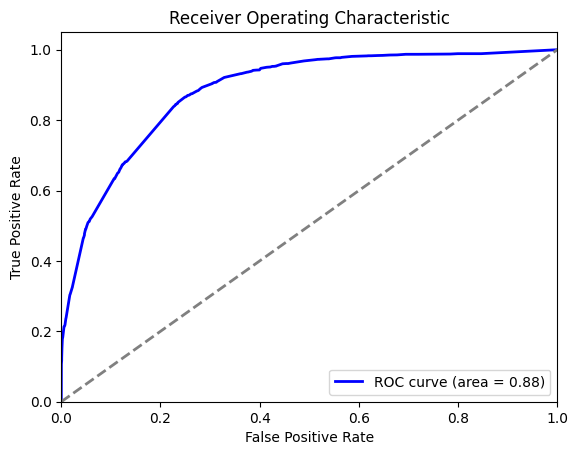

In [154]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the test set
y_scores = DecTree.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_scores))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Training with non normalized dataset

In [155]:
df_non_normalized = pd.read_csv('adult(cleaned non normalized).csv')

In [156]:
x = df_non_normalized.drop('income', axis=1)
y = df_non_normalized[['income']]

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, stratify=y)

In [158]:
DecTreeNonNormalized = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=10, min_samples_split=10, splitter='random')

In [159]:
DecTreeNonNormalized.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                       splitter='random')

In [160]:
y_pred = DecTreeNonNormalized.predict(x_test)

accuracy : 0.8037314122102152
recall : 0.5031563312291125
precision : 0.6325863678804855
f1 : 0.5604963805584281
confusion matrix: [[7347  787]
 [1338 1355]]


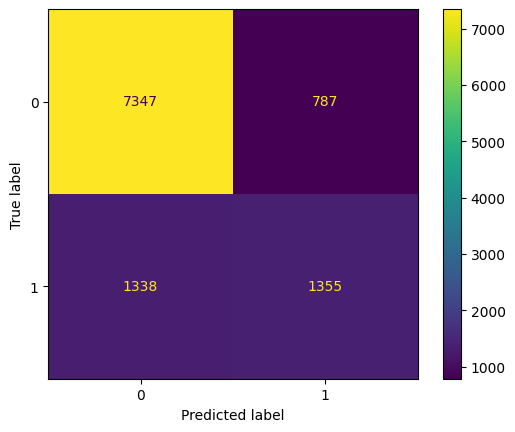

In [ ]:
metrics(y_test, y_pred)

### HyperParameter Tuning

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

from sklearn.model_selection import GridSearchCV

#Find Best K based on accuracy

grid_kn=GridSearchCV(estimator=DecTree,#model
                     param_grid=param_grid, #params
                    scoring='precision',# Strategy to evaluate the performance of the cross-validation model on the test set.
                    cv= 5, # Cross-validation generator
                    verbose= 1, #Time to calculate
                    n_jobs= -1 #Help to cpu 
                    )
grid_kn.fit(x_train,y_train)

grid_kn.best_params_